## The CNN (Convolutional Neural Network) model is highly effective and relatively easy to handle. One of its significant advantages is the presence of tunable hyperparameters, which allow us to optimize the model for improved accuracy. Additionally, CNNs come with a range of predefined libraries, reducing the workload considerably compared to traditional image processing methods. This built-in functionality enables efficient feature extraction and streamlines the overall workflow, making CNNs an excellent choice for image classification and related tasks.

# Step1: Model and Training.
#### This code defines and trains a Convolutional Neural Network (CNN) model using TensorFlow and Keras. The model consists of several layers: two convolutional layers for feature detection (using 3x3 filters), each followed by a max pooling layer to reduce the spatial dimensions and keep essential features. After these layers, the model "flattens" the features into a one-dimensional array and uses dense (fully connected) layers to classify the image into one of 10 classes (or adjust based on the number of classes).

#### The data is loaded using ImageDataGenerator, which scales the image pixel values between 0 and 1 for normalization. Images are read from specified directories, resized to 32x32 pixels, and split into batches for training and testing. Finally, the model is trained on the dataset over multiple epochs, adjusting parameters with each pass to improve accuracy on both training and testing data.








In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# cnn model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # Change 10 to the number of classes you have
])

# model compile
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Normalize pixel values
train_datagen = ImageDataGenerator(rescale=1./255)  
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\Mahendar\\flaskproject\\sports_person_classification\\static\\images",  # Path to the training directory
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=32,
    class_mode='sparse'  
)

# Load testing data, this is for validation you can use the training directory as well
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\Mahendar\\flaskproject\\sports_person_classification\\static\\test_images",  # Path to the testing directory
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse' 


# Train the model
cnn.fit(train_generator, steps_per_epoch=train_generator.samples // train_generator.batch_size,
         validation_data=test_generator, validation_steps=test_generator.samples // test_generator.batch_size,
         epochs=50)  # Adjust epochs as needed,one good thing is it will take less time to load so you can adjust to maximum iteration aswell


Found 225 images belonging to 5 classes.
Found 54 images belonging to 5 classes.
Epoch 1/50
7/7 [==============================] - 2s 144ms/step - loss: 1.5640 - accuracy: 0.3472 - val_loss: 1.9092 - val_accuracy: 0.0938
Epoch 2/50
7/7 [==============================] - 0s 66ms/step - loss: 1.5660 - accuracy: 0.3679 - val_loss: 1.5945 - val_accuracy: 0.2188
Epoch 3/50
7/7 [==============================] - 0s 62ms/step - loss: 1.5213 - accuracy: 0.3575 - val_loss: 1.6462 - val_accuracy: 0.1562
Epoch 4/50
7/7 [==============================] - 0s 55ms/step - loss: 1.4933 - accuracy: 0.3938 - val_loss: 1.6908 - val_accuracy: 0.1562
Epoch 5/50
7/7 [==============================] - 0s 52ms/step - loss: 1.4771 - accuracy: 0.3627 - val_loss: 1.6164 - val_accuracy: 0.2812
Epoch 6/50
7/7 [==============================] - 0s 50ms/step - loss: 1.4717 - accuracy: 0.3627 - val_loss: 1.6560 - val_accuracy: 0.2500
Epoch 7/50
7/7 [==============================] - 0s 51ms/step - loss: 1.3923 - accu

# Step2: Calculate Training accuracy.
#### This code checks how well the CNN model performs on both the training and validation data. It calculates training accuracy and loss to see how well the model learned from its training set. Then, it tests on validation data to measure how accurately the model predicts on new, unseen data. Comparing these results helps ensure the model is generalizing well without overfitting.

In [37]:
# Evaluate the model on the training set
train_loss, train_accuracy = cnn.evaluate(
    train_generator,
    steps=train_generator.samples // train_generator.batch_size
)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the validation set
validation_loss, validation_accuracy = cnn.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f'Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}')


7/7 [==============================] - 1s 84ms/step - loss: 0.1163 - accuracy: 0.9821
Training Loss: 0.1163, Training Accuracy: 0.9821
1/1 [==============================] - 0s 188ms/step - loss: 0.0700 - accuracy: 1.0000
Validation Loss: 0.0700, Validation Accuracy: 1.0000


# Step3: Display images and their labels.
#### This function, plot_sample, displays a batch of sample images from the provided data generator. It pulls a batch of images and their labels, then plots a 3x3 grid of up to 9 images with their labels displayed as titles. The function provides a visual overview of images in the dataset, helping to verify that images and labels are loaded correctly.

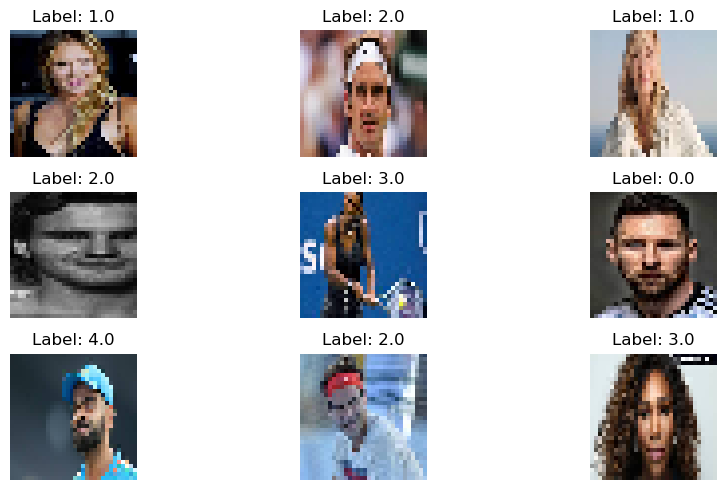

In [53]:
import matplotlib.pyplot as plt

def plot_sample(generator, steps=1):
    # Get a batch of images and labels
    images, labels = next(generator)
    
    # Create a figure with subplots
    plt.figure(figsize=(10, 5))
    
    # Determine how many images to plot
    num_images = min(len(images), 9)  # Here you can adjust images, i considered 9 images
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)  # Adjust for the number of images
        plt.imshow(images[i])  # Plot the image
        plt.title(f'Label: {labels[i]}')  # Display the label
        plt.axis('off')  # Hide axes
    
    plt.tight_layout()  # Adjust layout
    plt.show()

# Call the function
plot_sample(test_generator, steps=test_generator.samples // test_generator.batch_size)



## names 0=Lionel messi, 1= maria sarapova, 2= roger federer, 3= serena williams, 4= virat kholi